<a href="https://colab.research.google.com/github/HazelvdW/context-framed-listening/blob/main/framed_listening_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framed Listening: **TF-IDF analyses**
> By **Hazel A. van der Walle** (PhD student, Music, Durham University), September 2025.

This notebook analyses semantic similarity between music-evoked thought (MET)
descriptions at the aggregated document level to answer: "Does context cue
influence METs more than the music itself?"

Analysis approach:
- Works with aggregated documents (called "METdocs") ONLY
  - TF-IDF is a bag-of-words method optimised for document-level analysis with
    sufficient word overlap. Individual short texts (10-50 words) produce extremely
    sparse vectors with minimal lexical overlap, resulting in artificially low
    similarity values that do not reflect semantic relationships.
  - BERT and Word2Vec handle individual-level analysis as they capture semantic
    meaning beyond exact word matches.
- Aggregates all thoughts from each clip-context pair into documents (N=64)
- Calculates pairwise cosine similarities between METdocs
- Categorises document pairs by their stimuli conditions to compare similarity distributions
- Tests whether aggregated thoughts are more similar when sharing music vs sharing context

Key comparisons:
1. Same clip + different context VS Different clip + same context
   → Does music or context drive thought similarity at the document level?
2. Within vs between genre/context/clip conditions
   → What factors influence semantic coherence in aggregated METs?

Note: This document-level analysis complements the individual-level analyses
conducted with BERT and Word2Vec, providing a lexical perspective on semantic patterns.

---

All datasets generated and used for this study are openly available on GitHub https://github.com/HazelvdW/context-framed-listening.

In [1]:
!rm -r context-framed-listening
# Clone the GitHub repository
!git clone https://github.com/HazelvdW/context-framed-listening.git

rm: cannot remove 'context-framed-listening': No such file or directory
Cloning into 'context-framed-listening'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 429 (delta 0), reused 0 (delta 0), pack-reused 424 (from 2)
Receiving objects: 100% (429/429), 216.22 MiB | 24.88 MiB/s, done.
Resolving deltas: 100% (191/191), done.


Refresh files to see **"context-framed-listening"**.


---

## Setup

In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

---
## ANALYSIS AT COMBINED METdoc LEVEL

TF-IDF (Term Frequency-Inverse Document Frequency) is a bag-of-words approach
that weights words by their importance within documents relative to a corpus.
This method is optimized for document-level analysis where texts are long enough
to contain sufficient word overlap for meaningful similarity comparisons.

Analysis structure:
- Aggregates all thoughts from each clip-context pair into documents (N=64)
- Each METdoc represents the collective semantic profile of one experimental condition
- Compares documents using cosine similarity of TF-IDF vectors
- Uses identical condition categories as BERT and Word2Vec for cross-method comparison

Purpose: Examine lexical similarity patterns at the aggregated level
- Shows which condition pairs share similar vocabulary and word usage patterns
- Complements semantic similarity analyses from BERT and Word2Vec
- Useful for understanding document-level semantic profiles


Load in the data file "**METdocsLVL2.csv**" that contains the preprocessed text data of participants' thought desciptions grouped into "METdocs", generated using the code notebook titled [framed_listening_text_prep](https://github.com/HazelvdW/context-framed-listening/blob/main/framed_listening_text_prep.ipynb)

In [3]:
# Load TF-IDF-appropriate aggregated METdocs
print("Loading aggregated METdocs...")
METdocs = pd.read_csv('/content/context-framed-listening/NLP_outputs/METdocsLVL2.csv')
text_column = 'METdescr_prepLVL2'

print(f"Total METdocs (clip-context pairs): {len(METdocs)}")
print(f"Unique clips: {METdocs['clip_name'].nunique()}")
print(f"Unique contexts: {METdocs['context_word'].nunique()}")

Loading aggregated METdocs...
Total METdocs (clip-context pairs): 64
Unique clips: 16
Unique contexts: 4


### TF-IDF Vectorisation

In [4]:
print("\nComputing TF-IDF vectors for aggregated METdocs...")

# Initialise TF-IDF vectorizer
tfidf_vectorizer_docs = TfidfVectorizer(sublinear_tf=False)

# Fit and transform METdocs
tfidf_matrix_docs = tfidf_vectorizer_docs.fit_transform(METdocs[text_column].astype(str))

print(f"TF-IDF matrix shape: {tfidf_matrix_docs.shape}")
print(f"Number of unique terms: {len(tfidf_vectorizer_docs.get_feature_names_out())}")

# Save TF-IDF scores for METdocs
df_TFIDF_docs = pd.DataFrame(
    tfidf_matrix_docs.toarray(),
    columns=tfidf_vectorizer_docs.get_feature_names_out(),
    index=METdocs['ClipContext_pair']
)
df_TFIDF_docs.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_TFIDF_scores.csv',
                      encoding='utf-8')


Computing TF-IDF vectors for aggregated METdocs...
TF-IDF matrix shape: (64, 3325)
Number of unique terms: 3325


### Cosine Similarity Matrix


Calculating cosine similarity matrix...

TF-IDF Cosine Similarity Matrix (METdocs level):


ClipContext_pair,BAR-80s_LOW_02,BAR-80s_LOW_06,BAR-80s_MED_08,BAR-80s_MED_13,BAR-Ele_LOW_09,BAR-Ele_LOW_14,BAR-Ele_MED_19,BAR-Ele_MED_20,BAR-Jaz_LOW_19,BAR-Jaz_LOW_21,...,VIDEOGAME-Ele_MED_19,VIDEOGAME-Ele_MED_20,VIDEOGAME-Jaz_LOW_19,VIDEOGAME-Jaz_LOW_21,VIDEOGAME-Jaz_MED_02,VIDEOGAME-Jaz_MED_07,VIDEOGAME-Met_LOW_09,VIDEOGAME-Met_LOW_14,VIDEOGAME-Met_MED_19,VIDEOGAME-Met_MED_20
ClipContext_pair,,,,,,,,,,,,,,,,,,,,,
BAR-80s_LOW_02,1.000000,0.341980,0.358179,0.358328,0.344184,0.345180,0.408953,0.340433,0.321841,0.359571,...,0.392228,0.346242,0.286943,0.334202,0.380768,0.437105,0.332314,0.267711,0.310773,0.310947
BAR-80s_LOW_06,0.341980,1.000000,0.426238,0.335442,0.355636,0.407451,0.313701,0.325606,0.336328,0.440361,...,0.298549,0.266112,0.287858,0.286771,0.371370,0.391684,0.296229,0.230518,0.260956,0.274753
BAR-80s_MED_08,0.358179,0.426238,1.000000,0.424640,0.387232,0.445359,0.362594,0.360172,0.401012,0.452967,...,0.387771,0.315025,0.333351,0.403461,0.407920,0.394449,0.358442,0.303518,0.344153,0.332642
BAR-80s_MED_13,0.358328,0.335442,0.424640,1.000000,0.376855,0.370450,0.375945,0.321061,0.410123,0.362957,...,0.386010,0.357943,0.376403,0.361567,0.383822,0.385968,0.368329,0.287007,0.340189,0.336044
BAR-Ele_LOW_09,0.344184,0.355636,0.387232,0.376855,1.000000,0.413536,0.368102,0.331279,0.354978,0.395798,...,0.354968,0.334759,0.351387,0.348050,0.348303,0.333701,0.376711,0.329743,0.387856,0.355314


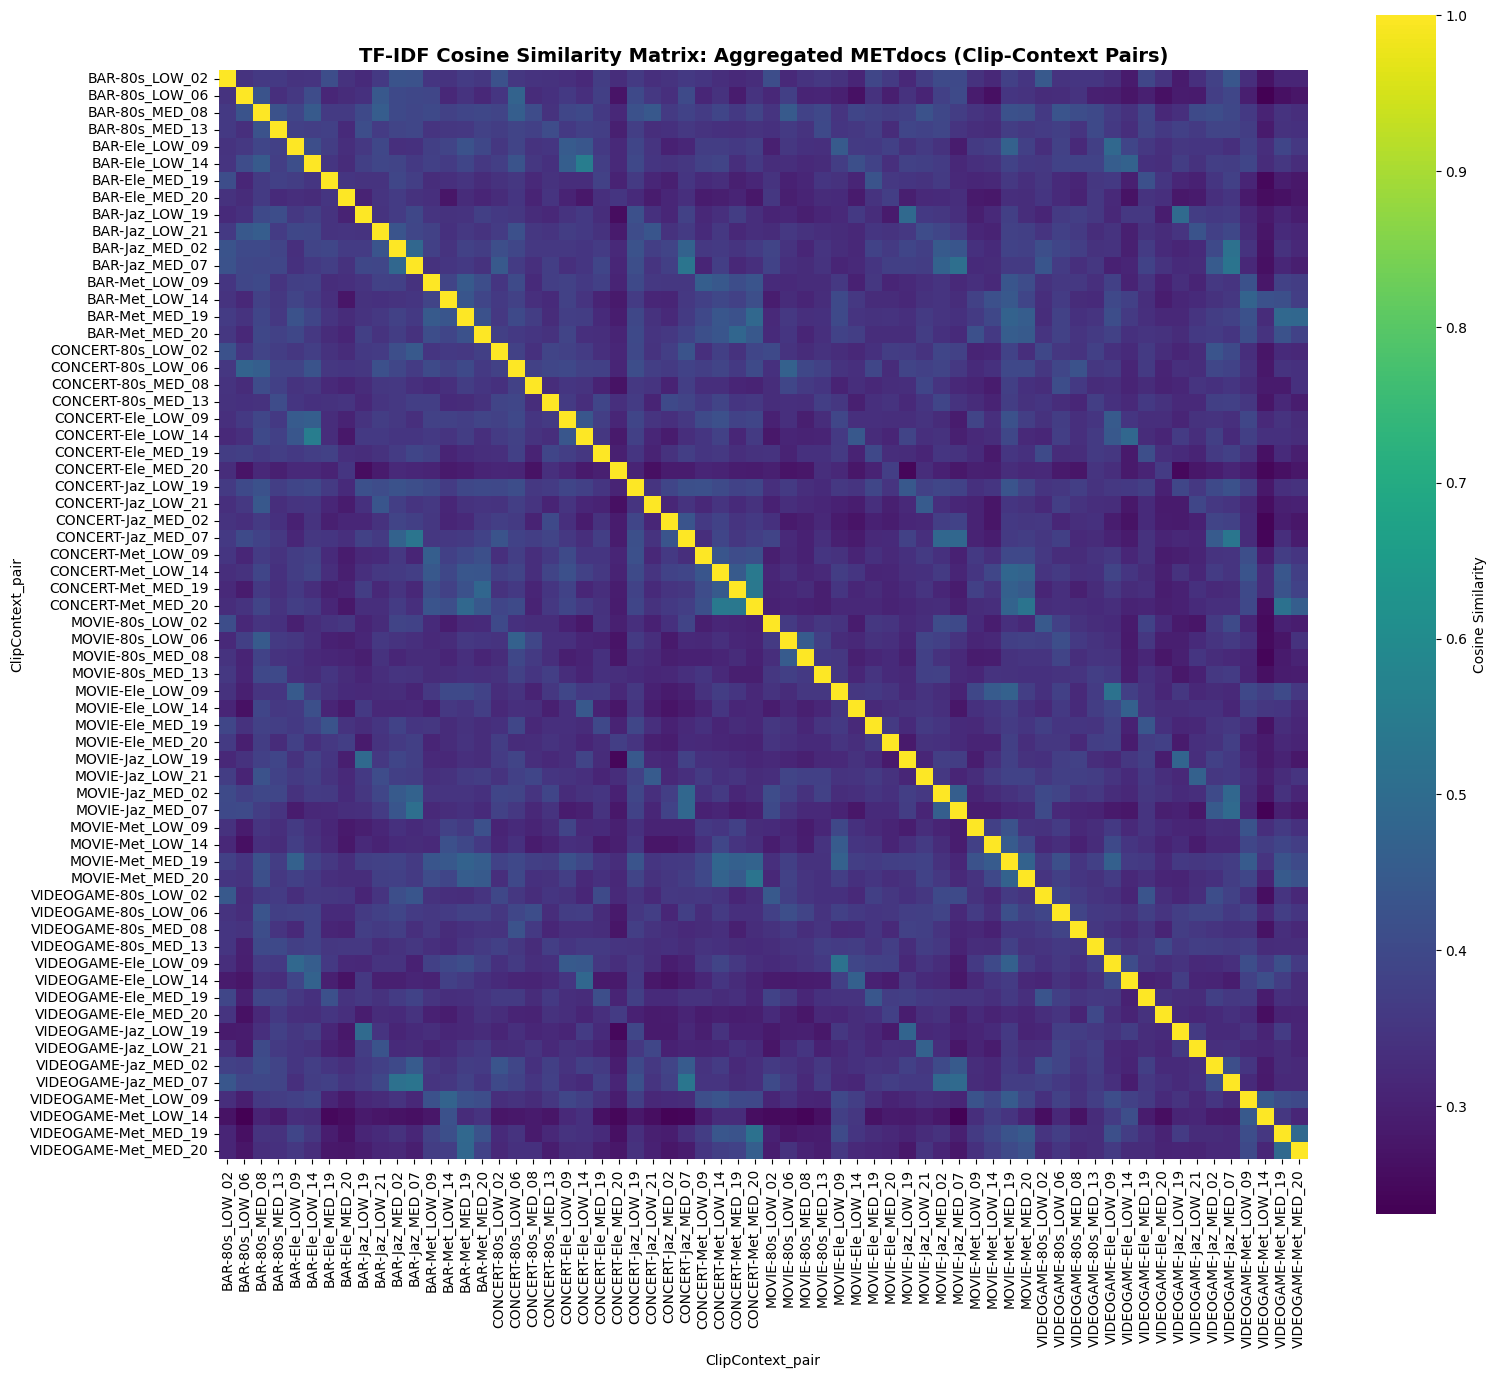

In [5]:
print("\nCalculating cosine similarity matrix...")
cosineMatrix_TFIDF = cosine_similarity(tfidf_matrix_docs, tfidf_matrix_docs)

# Create labeled DataFrame
cosineMatrix_TFIDF_df = pd.DataFrame(
    cosineMatrix_TFIDF,
    index=METdocs['ClipContext_pair'],
    columns=METdocs['ClipContext_pair']
)

# Save cosine similarity matrix
cosineMatrix_TFIDF_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_cosineMatrix_TFIDF.csv',
                               encoding='utf-8')

print("\nTF-IDF Cosine Similarity Matrix (METdocs level):")
display(cosineMatrix_TFIDF_df.head())

plt.figure(figsize=(16, 14))
sns.heatmap(cosineMatrix_TFIDF_df, cmap='viridis', annot=False, square=True,
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('TF-IDF Cosine Similarity Matrix: Aggregated METdocs (Clip-Context Pairs)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_heatmap_TFIDF.png',
            dpi=300, bbox_inches='tight')
plt.show()

### Similarity Values by Condition

In [6]:
print("\nExtracting similarity values by condition...")

clips = METdocs['clip_name'].values
contexts = METdocs['context_word'].values
genres = METdocs['genre_code'].values

similarity_data = {
    'doc_i': [],
    'doc_j': [],
    'similarity': [],
    'same_clip': [],
    'same_context': [],
    'same_genre': [],
    'condition': []
}

n_docs = len(METdocs)
print(f"Processing {(n_docs * (n_docs - 1)) // 2} unique document pairs...")

for i in range(n_docs):
    if (i + 1) % 10 == 0:
        print(f"  Processed {i + 1}/{n_docs} documents...")

    for j in range(i + 1, n_docs):
        sim_value = cosineMatrix_TFIDF[i, j]

        same_clip = clips[i] == clips[j]
        same_context = contexts[i] == contexts[j]
        same_genre = genres[i] == genres[j]

        # DETAILED CONDITIONS (for specific comparisons)
        if same_clip and same_context:
            condition = 'same_clip_same_context'
        elif same_clip and not same_context:
            condition = 'same_clip_diff_context'  # MUSIC influence
        elif not same_clip and same_context:
            condition = 'diff_clip_same_context'  # CONTEXT influence
        elif not same_clip and not same_context:
            if same_genre:
                condition = 'diff_clip_diff_context_same_genre'
            else:
                condition = 'diff_clip_diff_context_diff_genre'
        else:
            condition = 'other'  # shouldn't happen but safeguard

        similarity_data['doc_i'].append(i)
        similarity_data['doc_j'].append(j)
        similarity_data['similarity'].append(sim_value)
        similarity_data['same_clip'].append(same_clip)
        similarity_data['same_context'].append(same_context)
        similarity_data['same_genre'].append(same_genre)
        similarity_data['condition'].append(condition)

sim_df_docs = pd.DataFrame(similarity_data)
sim_df_docs.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_similarity_by_condition_TFIDF.csv',
                    index=False)

print("\nMETdocs-level similarity measures extracted:")
print(sim_df_docs.groupby('condition')['similarity'].agg(['count', 'mean', 'std', 'min', 'max']))



Extracting similarity values by condition...
Processing 2016 unique document pairs...
  Processed 10/64 documents...
  Processed 20/64 documents...
  Processed 30/64 documents...
  Processed 40/64 documents...
  Processed 50/64 documents...
  Processed 60/64 documents...

METdocs-level similarity measures extracted:
                                   count      mean       std       min  \
condition                                                                
diff_clip_diff_context_diff_genre   1152  0.335158  0.033651  0.230518   
diff_clip_diff_context_same_genre    288  0.363182  0.048555  0.257666   
diff_clip_same_context               480  0.354024  0.040283  0.259544   
same_clip_diff_context                96  0.422625  0.050381  0.326656   

                                        max  
condition                                    
diff_clip_diff_context_diff_genre  0.465631  
diff_clip_diff_context_same_genre  0.518031  
diff_clip_same_context             0.540833  
same_c

### STATISTICAL ANALYSES

1. PRIMARY RESEARCH QUESTION
2. Genre Effects
3. Context Specificity
4. Music Specificity
5. OMNIBUS TEST
6. Condition Means Ranking

In [7]:
def compare_conditions(df, cond1, cond2, label1, label2):
    """Compare two specific conditions with t-test and effect size."""
    data1 = df[df['condition'] == cond1]['similarity']
    data2 = df[df['condition'] == cond2]['similarity']

    t_stat, p_value = stats.ttest_ind(data1, data2)
    pooled_std = np.sqrt((data1.std()**2 + data2.std()**2) / 2)
    effect_size = (data1.mean() - data2.mean()) / pooled_std

    if p_value < 0.001:
        sig_str = "***"
    elif p_value < 0.01:
        sig_str = "**"
    elif p_value < 0.05:
        sig_str = "*"
    else:
        sig_str = "n.s."

    return {
        'comparison': f"{label1} vs {label2}",
        'mean1': data1.mean(),
        'mean2': data2.mean(),
        'diff': data1.mean() - data2.mean(),
        't': t_stat,
        'p': p_value,
        'sig': sig_str,
        'd': effect_size,
        'n1': len(data1),
        'n2': len(data2)
    }


def compare_binary(df, column, label):
    """Compare same vs different for a binary factor."""
    same_data = df[df[column] == True]['similarity']
    diff_data = df[df[column] == False]['similarity']

    t_stat, p_value = stats.ttest_ind(same_data, diff_data)
    pooled_std = np.sqrt((same_data.std()**2 + diff_data.std()**2) / 2)
    effect_size = (same_data.mean() - diff_data.mean()) / pooled_std

    if p_value < 0.001:
        sig_str = "***"
    elif p_value < 0.01:
        sig_str = "**"
    elif p_value < 0.05:
        sig_str = "*"
    else:
        sig_str = "n.s."

    return {
        'comparison': f"Same {label} vs Different {label}",
        'mean_same': same_data.mean(),
        'mean_diff': diff_data.mean(),
        'diff': same_data.mean() - diff_data.mean(),
        't': t_stat,
        'p': p_value,
        'sig': sig_str,
        'd': effect_size,
        'n_same': len(same_data),
        'n_diff': len(diff_data)
    }

# Store results
binary_comparisons = []
combined_comparisons = []


# PART 1: BINARY COMPARISONS (Same vs Different for each factor)
# ---------------------------------------------------------------------------
print("\n" + "-"*70)
print("PART 1: BINARY COMPARISONS - Fundamental Effects")
print("-"*70)
print("Testing whether sharing a factor (clip/context/genre) increases similarity")

# 1. CLIP EFFECT: Same vs Different
print("\n1. CLIP EFFECT: Same Clip vs Different Clip")
print("-" * 70)
clip_comp = compare_binary(sim_df_docs, 'same_clip', 'Clip')
binary_comparisons.append(clip_comp)

print(f"Same clip: M={clip_comp['mean_same']:.4f}, SD={sim_df_docs[sim_df_docs['same_clip']]['similarity'].std():.4f} (N={clip_comp['n_same']})")
print(f"Different clip: M={clip_comp['mean_diff']:.4f}, SD={sim_df_docs[~sim_df_docs['same_clip']]['similarity'].std():.4f} (N={clip_comp['n_diff']})")
print(f"Difference: {clip_comp['diff']:.4f}")
print(f"t({clip_comp['n_same'] + clip_comp['n_diff'] - 2}) = {clip_comp['t']:.3f}, p = {clip_comp['p']:.4f} {clip_comp['sig']}")
print(f"Cohen's d = {clip_comp['d']:.3f}")

if clip_comp['mean_same'] > clip_comp['mean_diff']:
    print("→ Sharing the same CLIP significantly increases similarity")
else:
    print("→ Same clip does NOT significantly increase similarity")

# 2. CONTEXT EFFECT: Same vs Different
print("\n\n2. CONTEXT EFFECT: Same Context vs Different Context")
print("-" * 70)
context_comp = compare_binary(sim_df_docs, 'same_context', 'Context')
binary_comparisons.append(context_comp)

print(f"Same context: M={context_comp['mean_same']:.4f}, SD={sim_df_docs[sim_df_docs['same_context']]['similarity'].std():.4f} (N={context_comp['n_same']})")
print(f"Different context: M={context_comp['mean_diff']:.4f}, SD={sim_df_docs[~sim_df_docs['same_context']]['similarity'].std():.4f} (N={context_comp['n_diff']})")
print(f"Difference: {context_comp['diff']:.4f}")
print(f"t({context_comp['n_same'] + context_comp['n_diff'] - 2}) = {context_comp['t']:.3f}, p = {context_comp['p']:.4f} {context_comp['sig']}")
print(f"Cohen's d = {context_comp['d']:.3f}")

if context_comp['mean_same'] > context_comp['mean_diff']:
    print("→ Sharing the same CONTEXT significantly increases similarity")
else:
    print("→ Same context does NOT significantly increase similarity")

# 3. GENRE EFFECT: Same vs Different
print("\n\n3. GENRE EFFECT: Same Genre vs Different Genre")
print("-" * 70)
genre_comp = compare_binary(sim_df_docs, 'same_genre', 'Genre')
binary_comparisons.append(genre_comp)

print(f"Same genre: M={genre_comp['mean_same']:.4f}, SD={sim_df_docs[sim_df_docs['same_genre']]['similarity'].std():.4f} (N={genre_comp['n_same']})")
print(f"Different genre: M={genre_comp['mean_diff']:.4f}, SD={sim_df_docs[~sim_df_docs['same_genre']]['similarity'].std():.4f} (N={genre_comp['n_diff']})")
print(f"Difference: {genre_comp['diff']:.4f}")
print(f"t({genre_comp['n_same'] + genre_comp['n_diff'] - 2}) = {genre_comp['t']:.3f}, p = {genre_comp['p']:.4f} {genre_comp['sig']}")
print(f"Cohen's d = {genre_comp['d']:.3f}")

if genre_comp['mean_same'] > genre_comp['mean_diff']:
    print("→ Sharing the same GENRE significantly increases similarity")
else:
    print("→ Same genre does NOT significantly increase similarity")

# KEY COMPARISON: Which factor matters most?
print("\n\n" + "="*70)
print("KEY FINDING: Comparing Binary Effects")
print("="*70)

effects = [
    ('CLIP', clip_comp['d'], clip_comp['diff']),
    ('CONTEXT', context_comp['d'], context_comp['diff']),
    ('GENRE', genre_comp['d'], genre_comp['diff'])
]
effects_sorted = sorted(effects, key=lambda x: abs(x[1]), reverse=True)

print("\nEffect sizes ranked (absolute Cohen's d):")
for i, (factor, d, diff) in enumerate(effects_sorted, 1):
    print(f"  {i}. {factor}: d = {d:.3f}, mean difference = {diff:.4f}")

print(f"\n→ {effects_sorted[0][0]} has the LARGEST effect on thought similarity")
print(f"→ {effects_sorted[1][0]} has a MODERATE effect")
print(f"→ {effects_sorted[2][0]} has the SMALLEST effect")

# PART 2: COMBINED CONDITION COMPARISONS (Isolating specific effects)
# ---------------------------------------------------------------------------
print("\n\n" + "-"*70)
print("PART 2: COMBINED CONDITION COMPARISONS")
print("-"*70)
print("Testing specific scenarios while controlling for other factors")

# 1. PRIMARY RESEARCH QUESTION: Music vs Context (when everything else differs)
print("\n1. PRIMARY QUESTION: Music vs Context Influence (isolated effects)")
print("-" * 70)

comp = compare_conditions(
    sim_df_docs,
    'same_clip_diff_context',
    'diff_clip_same_context',
    'Same Clip, Different Context',
    'Different Clip, Same Context'
)
combined_comparisons.append(comp)

print(f"\nSame clip, different context: M={comp['mean1']:.4f} (N={comp['n1']})")
print(f"Different clip, same context: M={comp['mean2']:.4f} (N={comp['n2']})")
print(f"Difference: {comp['diff']:.4f}")
print(f"t({comp['n1'] + comp['n2'] - 2}) = {comp['t']:.3f}, p = {comp['p']:.4f} {comp['sig']}")
print(f"Cohen's d = {comp['d']:.3f}")

if comp['mean1'] > comp['mean2']:
    print("\n→ When isolated: MUSIC (clip) drives similarity MORE than CONTEXT")
else:
    print("\n→ When isolated: CONTEXT drives similarity MORE than MUSIC (clip)")

# 2. GENRE EFFECTS (when clip and context both differ)
print("\n\n2. GENRE EFFECTS: When both clip and context differ")
print("-" * 70)

comp = compare_conditions(
    sim_df_docs,
    'diff_clip_diff_context_same_genre',
    'diff_clip_diff_context_diff_genre',
    'Both Different, Same Genre',
    'Both Different, Different Genre'
)
combined_comparisons.append(comp)

print(f"\nSame genre (different clip & context): M={comp['mean1']:.4f} (N={comp['n1']})")
print(f"Different genre (different clip & context): M={comp['mean2']:.4f} (N={comp['n2']})")
print(f"Difference: {comp['diff']:.4f}")
print(f"t = {comp['t']:.3f}, p = {comp['p']:.4f} {comp['sig']}, d = {comp['d']:.3f}")

if comp['sig'] != 'n.s.':
    print("\n→ Genre creates semantic coherence even when clip and context differ")
else:
    print("\n→ Genre does NOT significantly affect similarity when other factors differ")

# 3. ADDITIVE EFFECTS: Context Specificity
print("\n\n3. ADDITIVE EFFECTS: Does same context + same clip > same context alone?")
print("-" * 70)

comp = compare_conditions(
    sim_df_docs,
    'same_clip_same_context',
    'diff_clip_same_context',
    'Same Context & Same Clip',
    'Same Context, Different Clip'
)
combined_comparisons.append(comp)

print(f"\nSame context + same clip: M={comp['mean1']:.4f} (N={comp['n1']})")
print(f"Same context, different clip: M={comp['mean2']:.4f} (N={comp['n2']})")
print(f"Difference: {comp['diff']:.4f}")
print(f"t = {comp['t']:.3f}, p = {comp['p']:.4f} {comp['sig']}, d = {comp['d']:.3f}")

if comp['sig'] != 'n.s.':
    print("\n→ Adding the same clip to same context creates ADDITIONAL similarity")
else:
    print("\n→ Same clip does NOT add significant similarity beyond same context")

# 4. ADDITIVE EFFECTS: Music Specificity
print("\n\n4. ADDITIVE EFFECTS: Does same clip + same context > same clip alone?")
print("-" * 70)

comp = compare_conditions(
    sim_df_docs,
    'same_clip_same_context',
    'same_clip_diff_context',
    'Same Clip & Same Context',
    'Same Clip, Different Context'
)
combined_comparisons.append(comp)

print(f"\nSame clip + same context: M={comp['mean1']:.4f} (N={comp['n1']})")
print(f"Same clip, different context: M={comp['mean2']:.4f} (N={comp['n2']})")
print(f"Difference: {comp['diff']:.4f}")
print(f"t = {comp['t']:.3f}, p = {comp['p']:.4f} {comp['sig']}, d = {comp['d']:.3f}")

if comp['sig'] != 'n.s.':
    print("\n→ Adding the same context to same clip creates ADDITIONAL similarity")
else:
    print("\n→ Same context does NOT add significant similarity beyond same clip")

# PART 3: OMNIBUS TEST
# ---------------------------------------------------------------------------
print("\n\n" + "-"*70)
print("PART 3: OMNIBUS TEST")
print("-"*70)

conditions_list = sim_df_docs['condition'].unique()
groups = [sim_df_docs[sim_df_docs['condition'] == cond]['similarity'] for cond in conditions_list]
f_stat, p_anova = stats.f_oneway(*groups)

print(f"\nOne-way ANOVA across all {len(conditions_list)} conditions:")
print(f"F({len(conditions_list)-1}, {len(sim_df_docs)-len(conditions_list)}) = {f_stat:.3f}, p = {p_anova:.4e}")

if p_anova < 0.001:
    print("→ Conditions are HIGHLY significantly different overall")
else:
    print("→ Conditions show significant differences" if p_anova < 0.05 else "→ No significant differences")

# PART 4: SUMMARY TABLES
# ---------------------------------------------------------------------------
print("\n\n" + "-"*70)
print("PART 4: SUMMARY TABLES")
print("-"*70)

# Condition means ranking
print("\nCondition means (ranked):")
condition_means = sim_df_docs.groupby('condition')['similarity'].agg(['mean', 'std', 'count'])
condition_means = condition_means.sort_values('mean', ascending=False)
print(condition_means)

# Binary comparisons summary
print("\n\nBinary Comparisons Summary (ranked by effect size):")
binary_df = pd.DataFrame(binary_comparisons)
binary_df = binary_df.sort_values('d', key=abs, ascending=False)
print(binary_df[['comparison', 'mean_same', 'mean_diff', 'diff', 'd', 'p', 'sig']])

# Combined comparisons summary
print("\n\nCombined Condition Comparisons (ranked by effect size):")
combined_df = pd.DataFrame(combined_comparisons)
combined_df = combined_df.sort_values('d', key=abs, ascending=False)
print(combined_df[['comparison', 'mean1', 'mean2', 'diff', 'd', 'p', 'sig']])

# SAVE RESULTS
# ---------------------------------------------------------------------------
# Save all comparisons
binary_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_binary_comparisons_TFIDF.csv',
                 index=False)
combined_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_combined_comparisons_TFIDF.csv',
                   index=False)

print("\n\nStatistical comparison results saved!")


----------------------------------------------------------------------
PART 1: BINARY COMPARISONS - Fundamental Effects
----------------------------------------------------------------------
Testing whether sharing a factor (clip/context/genre) increases similarity

1. CLIP EFFECT: Same Clip vs Different Clip
----------------------------------------------------------------------
Same clip: M=0.4226, SD=0.0504 (N=96)
Different clip: M=0.3441, SD=0.0395 (N=1920)
Difference: 0.0785
t(2014) = 18.718, p = 0.0000 ***
Cohen's d = 1.734
→ Sharing the same CLIP significantly increases similarity


2. CONTEXT EFFECT: Same Context vs Different Context
----------------------------------------------------------------------
Same context: M=0.3540, SD=0.0403 (N=480)
Different context: M=0.3459, SD=0.0442 (N=1536)
Difference: 0.0081
t(2014) = 3.594, p = 0.0003 ***
Cohen's d = 0.193
→ Sharing the same CONTEXT significantly increases similarity


3. GENRE EFFECT: Same Genre vs Different Genre
---------

/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### Visualisations

1. PRIMARY COMPARISON: Music vs Context
2. ALL CONDITIONS comparison
3. Bar plot with means and 95% CI
4. Distribution comparison histogram
5. HIERARCHICAL comparison
6. Genre effects visualisation
7. Heatmap


Generating visualizations...


/tmp/ipython-input-3925169864.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=clip_data, x='clip_label', y='similarity', ax=axes[0],
/tmp/ipython-input-3925169864.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=context_data, x='context_label', y='similarity', ax=axes[1],
/tmp/ipython-input-3925169864.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=genre_data, x='genre_label', y='similarity', ax=axes[2],


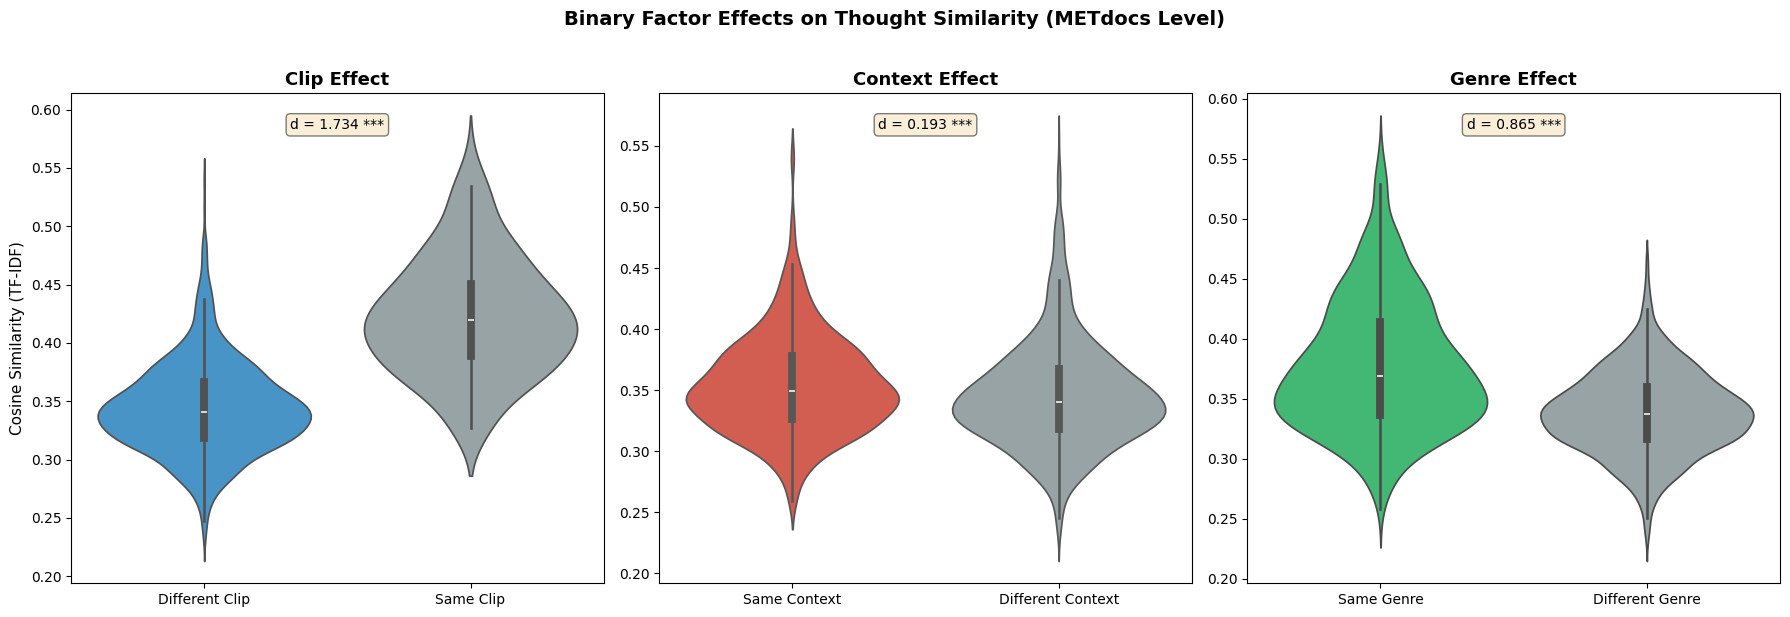

In [8]:
print("\nGenerating visualizations...")

# Get data for visualizations
music_driven_docs = sim_df_docs[sim_df_docs['condition'] == 'same_clip_diff_context']['similarity']
context_driven_docs = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_same_context']['similarity']
same_both_docs = sim_df_docs[sim_df_docs['condition'] == 'same_clip_same_context']['similarity']

# 0. BINARY COMPARISONS VISUALIZATION
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Clip comparison
clip_data = sim_df_docs.copy()
clip_data['clip_label'] = clip_data['same_clip'].map({True: 'Same Clip', False: 'Different Clip'})
sns.violinplot(data=clip_data, x='clip_label', y='similarity', ax=axes[0],
               palette=['#3498db', '#95a5a6'])
axes[0].set_title('Clip Effect', fontsize=13, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Cosine Similarity (TF-IDF)', fontsize=11)
axes[0].text(0.5, 0.95, f"d = {clip_comp['d']:.3f} {clip_comp['sig']}",
             ha='center', va='top', transform=axes[0].transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Context comparison
context_data = sim_df_docs.copy()
context_data['context_label'] = context_data['same_context'].map({True: 'Same Context', False: 'Different Context'})
sns.violinplot(data=context_data, x='context_label', y='similarity', ax=axes[1],
               palette=['#e74c3c', '#95a5a6'])
axes[1].set_title('Context Effect', fontsize=13, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].text(0.5, 0.95, f"d = {context_comp['d']:.3f} {context_comp['sig']}",
             ha='center', va='top', transform=axes[1].transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Genre comparison
genre_data = sim_df_docs.copy()
genre_data['genre_label'] = genre_data['same_genre'].map({True: 'Same Genre', False: 'Different Genre'})
sns.violinplot(data=genre_data, x='genre_label', y='similarity', ax=axes[2],
               palette=['#2ecc71', '#95a5a6'])
axes[2].set_title('Genre Effect', fontsize=13, fontweight='bold')
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].text(0.5, 0.95, f"d = {genre_comp['d']:.3f} {genre_comp['sig']}",
             ha='center', va='top', transform=axes[2].transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Binary Factor Effects on Thought Similarity (METdocs Level)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_00_binary_comparisons.png',
            dpi=300, bbox_inches='tight')
plt.show()

### SUMMARY

In [9]:
print("\n" + "-"*70)
print("METDOCS-LEVEL ANALYSIS COMPLETE")
print("-"*70)

print("\nOutput files saved:")
print("  Data files:")
print("    - METdocs_TFIDF_scores.csv")
print("    - METdocs_cosineMatrix_TFIDF.csv")
print("    - METdocs_similarity_by_condition_TFIDF.csv")
print("    - METdocs_statistical_comparisons_TFIDF.csv")

print("\n  Visualisations:")
print("    - METdocs_heatmap_TFIDF_METdocs.png")
print("    - METdocs_01_music_vs_context_boxplot.png")
print("    - METdocs_02_all_conditions_violin.png")
print("    - METdocs_03_condition_means_barplot.png")
print("    - METdocs_04_music_vs_context_histogram.png")
print("    - METdocs_05_hierarchical_comparison.png")
print("    - METdocs_06_genre_effects_summary.png")
print("    - METdocs_07_condition_heatmap.png")
print("    - METdocs_00_binary_comparisons.png")

print("\n" + "-"*70)
print("KEY FINDINGS SUMMARY (METdocs Level)")
print("-"*70)

music_driven_summary = sim_df_docs[sim_df_docs['condition'] == 'same_clip_diff_context']['similarity']
context_driven_summary = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_same_context']['similarity']
diff = music_driven_summary.mean() - context_driven_summary.mean()
t_stat, p_value = stats.ttest_ind(music_driven_summary, context_driven_summary)
effect_size = diff / np.sqrt((music_driven_summary.std()**2 + context_driven_summary.std()**2) / 2)

print("\n1. PRIMARY RESEARCH QUESTION: Music vs Context")
if abs(diff) < 0.01:
    print(f"   → Music and context have EQUIVALENT influence (d={effect_size:.3f})")
elif music_driven_summary.mean() > context_driven_summary.mean():
    print(f"   → MUSIC drives similarity MORE than context")
    print(f"   → Difference: {diff:.4f} (d={effect_size:.3f}, p={p_value:.4f})")
else:
    print(f"   → CONTEXT drives similarity MORE than music")
    print(f"   → Difference: {abs(diff):.4f} (d={abs(effect_size):.3f}, p={p_value:.4f})")

same_genre = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_diff_context_same_genre']['similarity'].mean()
diff_genre = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_diff_context_diff_genre']['similarity'].mean()
print(f"\n2. GENRE EFFECTS")
print(f"   → Same genre: M={same_genre:.4f}")
print(f"   → Different genre: M={diff_genre:.4f}")
print(f"   → Difference: {same_genre - diff_genre:.4f}")

if len(same_both_docs) > 0:
    print(f"\n3. BASELINE (identical clip-context pairs)")
    print(f"   → Note: Same clip + same context = same document (N={len(same_both_docs)})")
    print(f"   → Mean similarity: {same_both_docs.mean():.4f}")

print("\n" + "-"*70)
print("METHODOLOGICAL NOTE:")
print("-"*70)
print("TF-IDF analysis was conducted ONLY at the document level because:")
print("\n  1. TF-IDF is a bag-of-words approach requiring lexical word overlap")
print("  2. Individual thoughts (10-50 words) are too short for reliable TF-IDF")
print("  3. Short texts produce extremely sparse vectors (mostly zeros)")
print("  4. Individual-level analysis showed artificially low similarities (M~0.01)")
print("     due to minimal word overlap between short texts")
print("\n  → BERT and Word2Vec were used for individual-level analysis as they")
print("     capture semantic meaning beyond exact word matches")
print("  → TF-IDF complements these methods at the document level with lexical")
print("     similarity patterns based on word usage and vocabulary overlap")
print("\nThis document-level TF-IDF analysis uses IDENTICAL condition categories")
print("as the individual-level BERT/Word2Vec analyses, enabling comparison of:")
print("  - Whether lexical patterns match semantic patterns")
print("  - Effect sizes across different representational approaches")
print("  - Consistency of findings across analysis scales and methods")
print("~"*70)


----------------------------------------------------------------------
METDOCS-LEVEL ANALYSIS COMPLETE
----------------------------------------------------------------------

Output files saved:
  Data files:
    - METdocs_TFIDF_scores.csv
    - METdocs_cosineMatrix_TFIDF.csv
    - METdocs_similarity_by_condition_TFIDF.csv
    - METdocs_statistical_comparisons_TFIDF.csv

  Visualisations:
    - METdocs_heatmap_TFIDF_METdocs.png
    - METdocs_01_music_vs_context_boxplot.png
    - METdocs_02_all_conditions_violin.png
    - METdocs_03_condition_means_barplot.png
    - METdocs_04_music_vs_context_histogram.png
    - METdocs_05_hierarchical_comparison.png
    - METdocs_06_genre_effects_summary.png
    - METdocs_07_condition_heatmap.png
    - METdocs_00_binary_comparisons.png

----------------------------------------------------------------------
KEY FINDINGS SUMMARY (METdocs Level)
----------------------------------------------------------------------

1. PRIMARY RESEARCH QUESTION: Music v